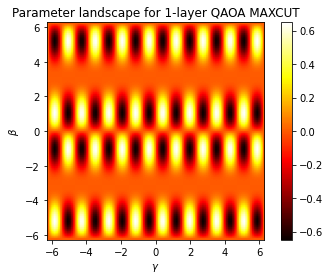

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import QAOA
from qiskit.utils import QuantumInstance
from qiskit_optimization.applications import Maxcut
from qiskit.opflow import AerPauliExpectation, PauliSumOp


max_cut = Maxcut(adjacency_matrix)
qubitOp, offset = max_cut.to_quadratic_program().to_ising()

# Define the QAOA circuit with 1 layer
p = 1
qaoa = QAOA(optimizer=COBYLA(), reps=p)

# Generate a range of values for the circuit parameters
gamma = np.linspace(-2*np.pi, 2*np.pi, 100)
beta = np.linspace(-2*np.pi, 2*np.pi, 100)

# Compute the objective function value for each parameter combination
obj_vals = np.zeros((len(gamma), len(beta)))
for i, gamma_val in enumerate(gamma):
    for j, beta_val in enumerate(beta):
        # Bind alpha and beta parameters to the operator
        qc = qaoa.construct_circuit([gamma_val, beta_val], operator=qubitOp)[0]
        # Evaluate Backend
        backend = Aer.get_backend('aer_simulator')
        statevector = Statevector.from_instruction(qc)
        # Use the Operator class to compute the expectation value of the Hamiltonian
        expectation =  statevector.expectation_value(qubitOp).real
        obj_vals[i,j] = expectation

        
        
# Plot the parameter landscape as a heatmap
plt.imshow(obj_vals.T, origin='lower', cmap='hot', extent=(-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi))
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\beta$')
plt.title('Parameter landscape for 1-layer QAOA MAXCUT')
plt.colorbar()
plt.show()


In [93]:
import plotly.graph_objs as go
# Create the Plotly figure
fig = go.Figure(data=[go.Surface(x=gamma, y=beta, z=obj_vals, colorscale='hot')])

# Set the layout and axes labels
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  width=700, height=700, margin=dict(l=65, r=50, b=65, t=90))

# Show the figure
fig.show()

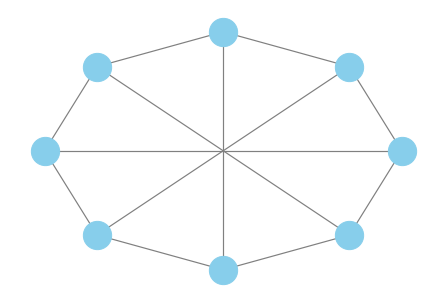

In [96]:
import networkx as nx
# Create a NetworkX graph from the adjacency matrix
G = nx.from_numpy_matrix(adj_matrix)

# Set the node positions using a circular layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(
    G, 
    pos, 
    with_labels=False, 
    node_size=800, 
    font_size=20, 
    font_weight='bold', 
    node_color='skyblue', 
    edge_color='grey',
    width=1.2
)

# Show the plot
plt.show()

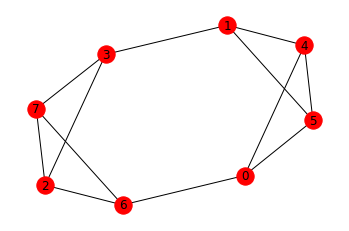

In [99]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a 3-regular graph with 8 nodes
G = nx.random_regular_graph(3, 8)

# Initialize a random partition of the nodes
partition = np.random.randint(0, 2, size=len(G))

# Compute the cut size of the initial partition
cut_size = 0
for (u, v) in G.edges():
    if partition[u] != partition[v]:
        cut_size += 1

# Run the local search algorithm to improve the partition
for _ in range(1000):
    # Choose a random node and flip its partition
    node = np.random.choice(list(G.nodes()))
    partition[node] = 1 - partition[node]

    # Compute the new cut size of the updated partition
    new_cut_size = 0
    for (u, v) in G.edges():
        if partition[u] != partition[v]:
            new_cut_size += 1

    # If the new cut size is larger, flip the node back
    if new_cut_size <= cut_size:
        cut_size = new_cut_size
    else:
        partition[node] = 1 - partition[node]



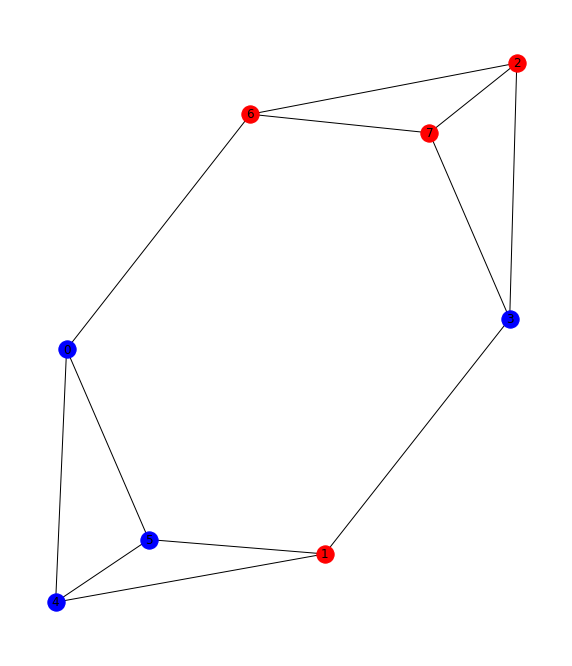

In [107]:
partition = [0,1,1,0,0,0,1,1]
# Color the nodes in each partition differently
pos = nx.spring_layout(G)
blue_nodes = [node for node in G.nodes() if partition[node] == 0]
red_nodes = [node for node in G.nodes() if partition[node] == 1]

# Create a figure and set its size
fig = plt.figure(figsize=(10, 12))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, nodelist=blue_nodes, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=red_nodes, node_color='r')
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()
